<a href="https://colab.research.google.com/github/Vk09Github/GitProject/blob/main/End_to_End_Multi_AI_RAG_chatbots_using_Langgraph_and_Asta_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langgraph cassio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 16.1 MB/s eta 0:00:00


In [5]:
import cassio
##Connection of the Astra DB

ASTRA_DB_APPLICATION_TOKEN="AstraCS:epxSrKBALJhODkiMLFSoerzx:56ae27e587f292fadcce276087a219f3eeac2878521f77b60f39013c75679c59"
ASTRA_DB_ID="49add748-0847-48a3-a912-8c1832b5793f"
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN,database_id=ASTRA_DB_ID)


In [6]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00


In [7]:
!pip install -U tiktoken langchain-groq langchainhub langchain langgraph langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [8]:
###Build index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader


### Docs to index

urls= [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

###Build index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader


### Docs to index

urls= [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

##load
docs = [WebBaseLoader(url).load() for url in urls]
doc_list=[item for sublist in docs for item in sublist]
print(doc_list)
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500,chunk_overlap=0)
docs_split=text_splitter.split_documents(doc_list)

docs_split=text_splitter.split_documents(doc_list)


[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [9]:
docs_split

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [10]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
from langchain_community.vectorstores.cassandra import Cassandra
astra_vector_store=Cassandra(embedding=embeddings,
                             table_name="qa_mini_demo",
                             session=None,
                             keyspace=None
                             )

In [12]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(docs_split)
print("Inserted %i headlines." % len(docs_split))
astra_vector_index=VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 88 headlines.


In [13]:
retriever=astra_vector_store.as_retriever()
retriever.invoke("What is Agent")

[Document(id='5832a99a641a49de9cce1122b654367c', metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context lear

In [14]:
##Langgrpah application
from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel,Field


/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
##Data Model

class RouteQuery(BaseModel):
  """Route a user query to most relevant datasource."""

  datasource: Literal["vectorstore","wiki_seaarch"]=Field(
      ...,
      description="Given a user question choose to route it to wikipedia or vectorstore.",
  )

In [16]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os
groq_api_key= userdata.get("GROQ_API_KEY")
print(groq_api_key)




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


In [17]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.3-70b-versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7837a26bbc90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7837a265b1d0>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [18]:
structured_llm_router=llm.with_structured_output(RouteQuery)

In [19]:
##Prompt

system="""You are an expert in routing a user question to a vectorstore or wikipedia.
The vectorstore contains documents related to agents,prompt engineering and adverserial attacks.
Use the vectore store for questions on these topics. Otherwise use wikisearch."""

route_prompt=ChatPromptTemplate.from_messages(
    [
    ("system",system),
    ("human","{question}"),
    ]
)
question_router=route_prompt | structured_llm_router

In [20]:
print(question_router.invoke({"question":"What is Agent"}))

datasource='vectorstore'


In [21]:
print(question_router.invoke({"question":"Who is Shah Rukh Khan"}))

datasource='wiki_seaarch'


In [22]:
!pip install langchain_community
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=d44bcc45654b2c6d2cde59582de36781187987172904a058af8fe22b5c7e5abf
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [23]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun
api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)


In [24]:
wiki.run("tell me about shah rukh khan")

'Page: My Name Is Khan\nSummary: My Name Is Khan is a 2010 drama film directed by Karan Johar and co-written by Shibani Bathija and Niranjan Iyengar. It stars Shah Rukh Khan and Kajol in the lead roles,'

In [25]:
### AI agent applications using Langgraph
from typing import List

### AI agent applications using Langgraph
from typing import List

from typing_extensions import TypedDict

class GraphState(TypedDict):
    """
    Represents the state of our graph

    Attributes:
        question:question
        generation:LLM generation
        documents:List of documents
    """
    question:str
    generation:str
### AI agent applications using Langgraph
from typing import List

from typing_extensions import TypedDict

class GraphState(TypedDict):
    """
    Represents the state of our graph

    Attributes:
        question:question
        generation:LLM generation
        documents:List of documents
    """
    question:str
### AI agent applications using Langgraph
from typing import List

from typing_extensions import TypedDict

class GraphState(TypedDict):
    """
    Represents the state of our graph

    Attributes:
        question:question
        generation:LLM generation
        documents:List of documents
    """
    question:str
    generation:str
    documents:List[str]
generation:str
documents:List[str]



In [43]:
from langchain.schema import Document

def retrieve(state):
  """
  Retrieve documents
  Args:
  state(dict): The current graph state

  Returns:
  state(dict): New key added to state,documents, that contains retrieved documents
  """
  print("---Retrieve---")
  question=state["question"]

  #Retrieval

  documents=retriever.invoke(question)
  return{"documents":documents,"question":question}
  state["documents"]=documents
  return state

In [44]:
def wiki_seaarch(state):
  """
  wiki-search on the rephrased question

  Args:
  state(dict): The current graph state
  Returns:
  state(dict): updates documents keys with appended web results
  """
  print("---wiki_search---")
  print("Hello")
  question=state["question"]
  print(question)

  ##Wiki Search

  docs=wiki.invoke({"query":question})
  print(docs)
  wiki_results=docs["result"]
  wiki_results=Document(page_content=wiki_results)
  return{"documents":wiki_results, "question":question}

In [45]:
### Edges

def route_question(state):
  """
  Route question to wiki search or RAG.

  Args:
  state(dict): the current graph state

  Returns:
  str: next node to call
  """
  print("---Route Question---")
  question=state["question"]
  source=question_router.invoke({"question":question})
  if source.datasource=="wikisearch":
    print("---Route question to WIKI search---")
    return "wiki_search"
  elif source.datasource=="vectorstore":
    print("---Route question to RAG---")
    return "vectorstore"


In [46]:
from langgraph.graph import END,StateGraph,START

workflow=StateGraph(GraphState)
###Define the nodes
# Corrected node name from wiki_search to wiki
workflow.add_node("wiki_search", wiki)##Wikisearch
workflow.add_node("vectorstore",retrieve) ##Retriever


##Build the Graph

workflow.add_conditional_edges(
    START,
    route_question,
    {"wiki_search" : "wiki_search",
     "vectorstore" : "vectorstore"
     },
)
workflow.add_edge("vectorstore",END) # Changed "retrieve" to "vectorstore" to match node name
workflow.add_edge("wiki_search",END)

##Compile

app=workflow.compile()

# Removed the duplicate workflow definition and compilation block

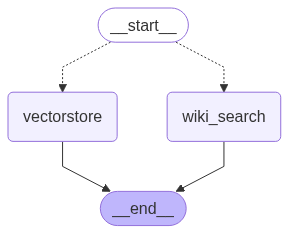

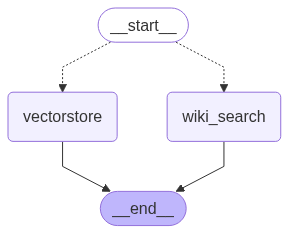

In [47]:
from logging import exception
from IPython.display import Image,display

from logging import exception
from IPython.display import Image,display

try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  ##This requires some extra dependencies
  pass
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  ##This requires some extra dependencies
  pass

In [48]:
from langchain.schema import Document

def retrieve(state):
  """
  Retrieve documents
  Args:
  state(dict): The current graph state

  Returns:
  state(dict): New key added to state,documents, that contains retrieved documents
  """
  print("---Retrieve---")
  question=state["question"]

  #Retrieval

  documents=retriever.invoke(question)
  # Corrected the variable name from 'questions' to 'question'
  # Removed the unreachable lines after the return statement
  return {"documents": documents, "question": question}

In [49]:
from pprint import pprint

##Run
Inputs= {
    "question":"What is Agent"
}
for output in app.stream(Inputs):
  for key,value in output.items():
    #Node
    pprint(f"Node '{key}':")
    ##optional : print full state at each node
    ##pprint.pprint(value['keys'],indent=2, width=80, depth=None)
    pprint("\n---\n")

    ##Final Generation
    # Access the documents and potentially the generation from the state
pprint(value['documents'][0].dict()['metadata']['description'])

---Route Question---


---Route question to RAG---
---Retrieve---
"Node 'vectorstore':"
'\n---\n'
('Building agents with LLM (large language model) as its core controller is a '
 'cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer '
 'and BabyAGI, serve as inspiring examples. The potentiality of LLM extends '
 'beyond generating well-written copies, stories, essays and programs; it can '
 'be framed as a powerful general problem solver.\n'
 'Agent System Overview\n'
 'In a LLM-powered autonomous agent system, LLM functions as the agent’s '
 'brain, complemented by several key components:\n'
 '\n'
 'Planning\n'
 '\n'
 'Subgoal and decomposition: The agent breaks down large tasks into smaller, '
 'manageable subgoals, enabling efficient handling of complex tasks.\n'
 'Reflection and refinement: The agent can do self-criticism and '
 'self-reflection over past actions, learn from mistakes and refine them for '
 'future steps, thereby improving the quality of final results.\n'
 '\n'
 '\

<ipython-input-49-373a6744e6c7>:17: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint(value['documents'][0].dict()['metadata']['description'])
